# 05wk-2: (신경망) – 신경망의 표현, GPU사용법, 확률적경사하강법

## 1. Imports

In [4]:
import torch
import matplotlib.pyplot as plt
import torchvision

## 2. 주요 코드 등

`# 시험`

- GPT, 검색 X
- 녹화영상(노트북, 데탑, 아이패드 등 사용 가능하지만 아무튼) -> 줌으로 해줄거임 ㅇㅇ

```Python
ds = torch.utils.data.TensorDataset(x)
dl = torch.utils.data.DataLoarder(ds, batch_size = 1024, shuffle = True) ## 확률적 경사하강법 - 가변 배치

net = torch.nn.Sequential(
    ???
).to("cuda:0")

loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD(net.parameters())

##-----##
for epoc in range(k) :
    for Xm, ym in dl :
        Xm.to("cuda:0")
        ym.to("cuda:0")
        yhat = net(Xm)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizr.step()
        optimizr.zero_grad()
```

아직 다 못함

## 3. 신경망의 표현

신경망의 표현: ${\boldsymbol x} \to \hat{\boldsymbol y}$ 로 가는 과정을
그림으로 표현

### A. 로지스틱

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(1)}} \overset{sig}{\to} \underset{(n,1)}{\boldsymbol v^{(1)}} =\underset{(n,1)}{\hat{\boldsymbol y}}$$

```Python
net = torch.nn.Sequence(
    torch.nn.Linear(1, 1),  ## l1(X) = u
    torch.nn.Sidmoid()      ## sig(u) = v
)
```

> 선형 변환은 u로 보통 하고, 순서대로 위 첨자를 붙여줌. 비선형도 마찬가지

`-` 모든 observation과 가중치를 명시한 버전

**(표현1)**

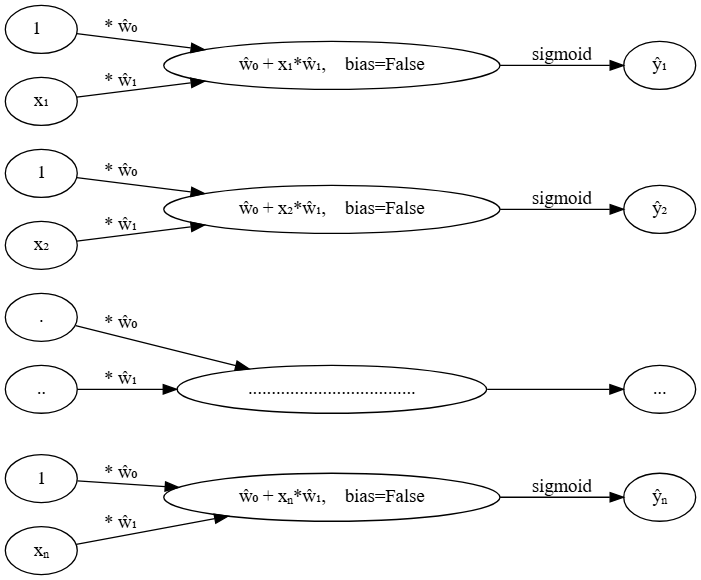

-   단점: 똑같은 그림의 반복이 너무 많음(샘플 수만큼 그림...)

`-` observation 반복을 생략한 버전들

**(표현2)** 모든 $i$에 대하여 아래의 그림을 반복한다고 하면 (표현1)과
같다.

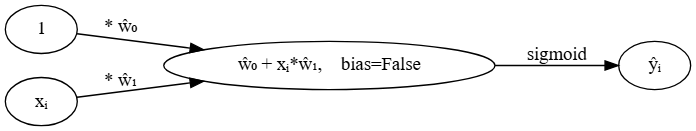

**(표현3)** 그런데 (표현2)에서 아래와 같이 $x_i$, $y_i$ 대신에 간단히
$x$, $y$로 쓰는 경우도 많음

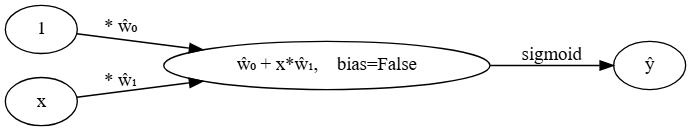

`-` 1을 생략한 버전들

**(표현4)** bais=False 대신에 bias=True를 주면 1을 생략할 수 있음

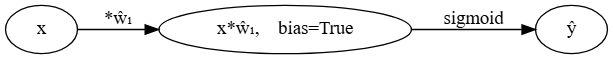

**(표현4의 수정)** $\hat{w}_1$대신에 $\hat{w}$를 쓰는 것이 더 자연스러움

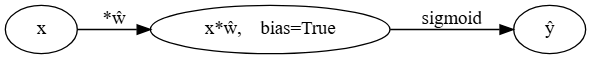

**(표현5)** 선형변환의 결과는 아래와 같이 $u$로 표현하기도 한다.

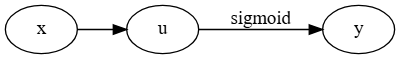

> 다이어그램은 그리는 사람의 취향에 따라 그리는 방법이 조금씩 다릅니다.
> 즉 교재마다 달라요.

> 그냥 시퀸스를 보고 코드만 짤 수 있으면 됨. 위에는 다 똑같은거라고 인지하면 됨...

### B. 스펙의역설

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{sig}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}} =\underset{(n,1)}{\hat{\boldsymbol y}}$$

**참고: 코드로 표현**

``` python
torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=1),
    torch.nn.Sigmoid()
)
```

`-` 이해를 위해서 예젠에 다루었던 아래의 상황을 고려하자.

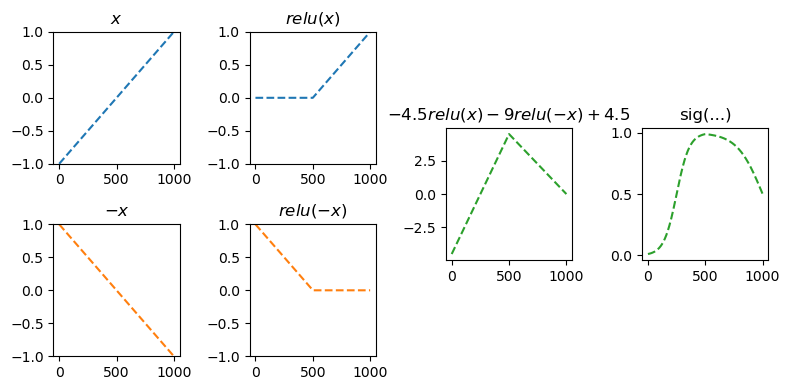

> yhat이 어떤 느낌일지를 잘 알아야 함

**(강의노트의 표현)**

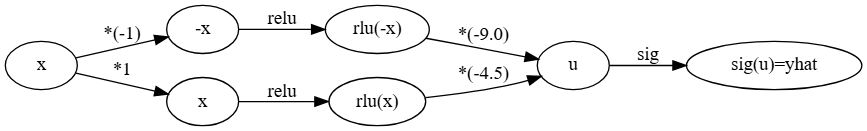

**(좀 더 일반화된 표현)** 상황을 일반화하면 아래와 같다.

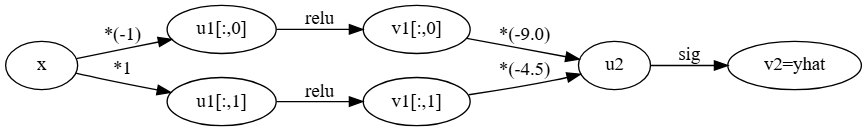

`*` Layer의 개념: ${\bf X}$에서 $\hat{\boldsymbol y}$로 가는 과정은
“선형변환+비선형변환”이 반복되는 구조이다. “선형변환+비선형변환”을
하나의 세트로 보면 아래와 같이 표현할 수 있다.

-   $\underset{(n,1)}{\bf X}  \overset{l_1}{\to} \left( \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \right) \overset{l_2}{\to} \left(\underset{(n,1)}{\boldsymbol u^{(2)}} \overset{sig}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}\right), \quad  \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{net({\bf X})}=\underset{(n,1)}{\hat{\boldsymbol y}}$

이것을 다이어그램으로 표현한다면 아래와 같다.

**(선형+비선형을 하나의 Layer로 묶은 표현)**

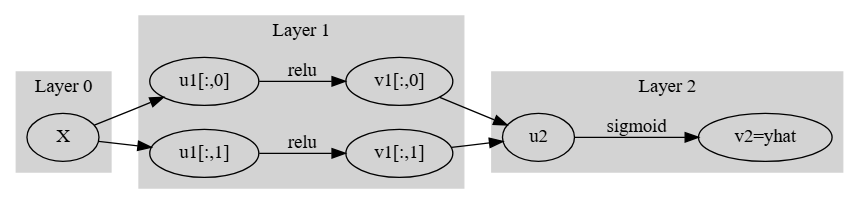

***Layer를 세는 방법***

-   **제 방식: 학습가능한 파라메터가 몇층으로 있는지… \<– 이것만
    기억하세여**
-   일부 교재 설명: 입력층은 계산하지 않음, activation layer는 계산하지
    않음. \<– 무시하세요.. 이러면 헷갈립니다..
-   위의 예제의 경우 `number of layer = 2` 이다.

* `dropout`은 그냥 기존 레이어에 포함시킴. 학습하는 층이 몇 개가 있는지 - 그냥 시퀸스에서 파라미터 입력한 수를 세면 됨.
* 아마 프로젝션 중 차원의 변환이 있는 경우만 레이어로 취급하는듯?

***Hidden Layer의 수를 세는 방법***

-   **제 방식: `Hidden Layer의 수 = Layer의 수 -1` \<– 이걸 기억하세여..**
-   일부 교재 설명:
    `Layer의 수 = Hidden Layer의 수 + 출력층의 수 = Hidden Layer의 수 + 1`
    \<– 기억하지 마세여
-   위의 예제의 경우 `number of hidden layer = 1` 이다.

> 대충 표상적인 레이어는 빼는 거. input layer와 output layer를 제외하니까 그냥 1 빼는 거임;

> **Important**
>
> 무조건 학습가능한 파라메터가 몇겹으로 있는지만 판단하세요. 딴거
> 아무것도 생각하지마세여
>
> ``` python
> ## 예시1 -- 2층 (히든레이어는 1층)
> torch.nn.Sequential(
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.ReLU(),
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
> )
> ```
>
> ``` python
> ## 예시2 -- 2층 (히든레이어는 1층)
> torch.nn.Sequential(
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.ReLU(),
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.Sigmoid(),
> )
> ```
>
> ``` python
> ## 예시3 -- 1층 (히든레이어는 없음!!)
> torch.nn.Sequential(
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
> ) 
> ```
>
> ``` python
> ## 예시4 -- 1층 (히든레이어는 없음!!)
> torch.nn.Sequential(
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.Sigmoid()
> ) 
> ```
>
> ``` python
> ## 예시5 -- 3층 (히든레이어는 2층)
> torch.nn.Sequential(
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.Sigmoid()
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.Sigmoid()
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층    
> ) 
> ```
>
> ``` python
> ## 예시6 -- 3층 (히든레이어는 2층)
> torch.nn.Sequential(
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.ReLU()
>     torch.nn.Dropout(??)
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.ReLU()
>     torch.nn.Dropout(??)
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층  
>     torch.nn.Sigmoid()
> ) 
> ```

> 요즘은 dropout 대신 batch normalization을 사용함. 근데 얘는 학습 가능한 파라미터가 있음에도 레이어로 취급하지 않음. 이 경우만 유의함

> **Important**
>
> 문헌에 따라서 레이어를 세는 개념이 제가 설명한 방식과 다른경우가
> 있습니다. 제가 설명한 방식보다 1씩 더해서 셉니다. 즉 아래의 경우
> 레이어를 3개로 카운트합니다.
>
> ``` python
> ## 예시1 -- 문헌에 따라 3층으로 세는 경우가 있음 (히든레이어는 1층)
> torch.nn.Sequential(
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.ReLU(),
>     torch.nn.Linear(??,??), ## <-- 학습해야할 가중치가 있는 층
>     torch.nn.Sigmoid()
> )
> ```
>
> 예를 들어
> [여기](https://en.wikipedia.org/wiki/Multilayer_perceptron#Layers)에서는
> 위의 경우 레이어는 3개라고 설명하고 있습니다. 이러한 카운팅은
> **“무시”하세요. 제가 설명한 방식이 맞아요.** [이
> 링크](https://en.wikipedia.org/wiki/Multilayer_perceptron#Layers)
> 잘못(?) 나와있는 이유는 아래와 같습니다.
>
> `-` 진짜 예전에 MLP를 소개할 초창기에서는 위의 경우 Layer를 3개로
> 셌음. (Rosenblatt et al. 1962)
>
> `-` 그런데 요즘은 그렇게 안셈.. (그리고 애초에 MLP라는 용어도 잘
> 안쓰죠..)
>
> 참고로 히든레이어의 수는 예전방식이나 지금방식이나 동일하게
> 카운트하므로 히든레이어만 세면 혼돈이 없습니다.

> 예전엔 레이어 수가 몇개이고, 이런걸 설명하는 게 중요했는데. 요즘은 안그래서 사장되고 있는 개념이긴 함.

`*` node의 개념: $u\to v$로 가는 쌍을 간단히 노드라는 개념을 이용하여
나타낼 수 있음.

**(노드의 개념이 포함된 그림)**

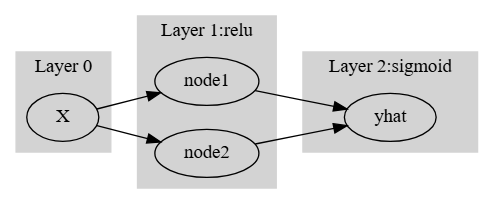

```Python
torch.nn.Sequential(
    torch.nn.Linear(1, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid()
)
```

여기에서 `node의 숫자 = feature의 숫자`와 같이 이해할 수 있다. 즉 아래와
같이 이해할 수 있다.

**(“number of nodes = number of features”로 이해한 그림)**

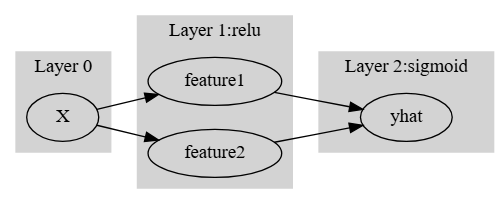

> 다이어그램의 표현방식은 교재마다 달라서 모든 예시를 달달 외울 필요는
> 없습니다. 다만 임의의 다이어그램을 보고 대응하는 네트워크를 pytorch로
> 구현하는 능력은 매우 중요합니다.

## C. MNIST

$$\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{sig}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

**(다이어그램표현)**

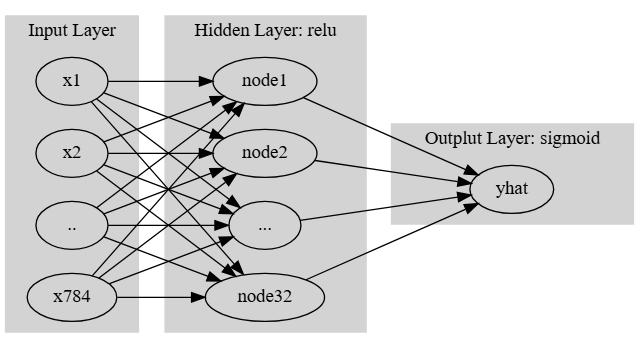

-   Layer0,1,2 대신에 Input Layer, Hidden Layer, Output Layer로 표현함

`-` 위의 다이어그램에 대응하는 코드

``` python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28*1,out_features=32),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=32,out_features=1),
    torch.nn.Sigmoid() 
)
```

> 학습해야 할 파라미터는 784 × 32개임. What의 차원

# 4. CPU vs GPU

`-` 파이토치에서 GPU를 쓰는 방법을 알아보자. (사실 지금까지 우리는 CPU만
쓰고 있었음)

`-` 코랩에서 GPU설정하는 방법: (아래영상참고)

<https://youtu.be/GyBL2YBCzoc>

## A. GPU 사용방법

`-` cpu 연산이 가능한 메모리에 데이터 저장

In [5]:
torch.manual_seed(43052)
x_cpu = torch.tensor([0.0,0.1,0.2]).reshape(-1,1) 
y_cpu = torch.tensor([0.0,0.2,0.4]).reshape(-1,1) 
net_cpu = torch.nn.Linear(1,1) 

`-` gpu 연산이 가능한 메모리에 데이터 저장

In [ ]:
torch.manual_seed(43052)
x_gpu = x_cpu.to("cuda:0")  ## gpu로 데이터 올림
y_gpu = y_cpu.to("cuda:0")
net_gpu = torch.nn.Linear(1,1).to("cuda:0") ## gpu로 네트워크 올림

In [7]:
x_cpu, x_gpu

(tensor([[0.0000],
         [0.1000],
         [0.2000]]),
 tensor([[0.0000],
         [0.1000],
         [0.2000]], device='cuda:0'))

> cpu에 저장된 오브젝트는 cpu에 저장된 것 끼리, gpu에 저장된 오브젝트는 gpu에 저장된 것 끼리 연산이 가능함

`-` cpu 혹은 gpu 연산이 가능한 메모리에 저장된 값들을 확인

In [9]:
net_cpu.weight, net_gpu.weight

(Parameter containing:
 tensor([[-0.3467]], requires_grad=True),
 Parameter containing:
 tensor([[-0.3467]], device='cuda:0', requires_grad=True))

In [11]:
# net_gpu(x_cpu) ## error
net_gpu(x_gpu)

tensor([[-0.8470],
        [-0.8817],
        [-0.9164]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
# torch.mean((y_gpu - net_cpu(x_cpu))**2) ## error
torch.mean((y_cpu - net_cpu(x_cpu))**2)

tensor(1.2068, grad_fn=<MeanBackward0>)

In [ ]:
# torch.mean((y_cpu-net_gpu(x_gpu))**2) ## error
torch.mean((y_gpu-net_gpu(x_gpu))**2)

tensor(1.2068, device='cuda:0', grad_fn=<MeanBackward0>)

### B. 시간측정(예비학습)

In [14]:
import time

In [ ]:
t1 = time.time()

In [16]:
t2 = time.time()

In [ ]:
t2 - t1 ## s 단위인듯

7.5288355350494385

### C. CPU vs GPU (500 nodes)

`-` CPU(500 nodes)

In [18]:
torch.manual_seed(5) 
x=torch.linspace(0,1,100).reshape(-1,1)
y=torch.randn(100).reshape(-1,1)*0.01
#---#
net = torch.nn.Sequential(
    torch.nn.Linear(1,500), ## 노드가 500개
    torch.nn.ReLU(),
    torch.nn.Linear(500,1)  ## 학습 파라미터는 500*2 == 1000 개
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
t1 = time.time()
for epoc in range(1000):    ## 에폭이 1000개
    # 1 
    yhat = net(x)
    # 2 
    loss = loss_fn(yhat,y)
    # 3 
    loss.backward()
    # 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2-t1

0.8595197200775146

In [19]:
torch.manual_seed(5) 
x=torch.linspace(0,1,100).reshape(-1,1).to("cuda:0")    ## 동일하지만 쿠다로 넣음
y=(torch.randn(100).reshape(-1,1)*0.01).to("cuda:0")
#---#
net = torch.nn.Sequential(
    torch.nn.Linear(1,500),
    torch.nn.ReLU(),
    torch.nn.Linear(500,1)
).to("cuda:0")  ## 네트워크도 쿠다로
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
t1 = time.time()
for epoc in range(1000):
    # 1 
    yhat = net(x)
    # 2 
    loss = loss_fn(yhat,y)
    # 3 
    loss.backward()
    # 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2-t1

0.8912351131439209

> CPU가 더 빠름?? -> 파라미터 수가 적으니까...

### D. CPU vs GPU (200,000 nodes)

`-` CPU

In [20]:
torch.manual_seed(5) 
x=torch.linspace(0,1,100).reshape(-1,1)
y=torch.randn(100).reshape(-1,1)*0.01
#---#
net = torch.nn.Sequential(
    torch.nn.Linear(1,200000),  ## 노드가 굉장히 많음
    torch.nn.ReLU(),
    torch.nn.Linear(200000,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
t1 = time.time()
for epoc in range(1000):
    # 1 
    yhat = net(x)
    # 2 
    loss = loss_fn(yhat,y)
    # 3 
    loss.backward()
    # 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2-t1

97.55405735969543

`-` GPU

In [21]:
torch.manual_seed(5) 
x=torch.linspace(0,1,100).reshape(-1,1).to("cuda:0")
y=(torch.randn(100).reshape(-1,1)*0.01).to("cuda:0")
#---#
net = torch.nn.Sequential(
    torch.nn.Linear(1,200000),
    torch.nn.ReLU(),
    torch.nn.Linear(200000,1)
).to("cuda:0")
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
t1 = time.time()
for epoc in range(1000):
    # 1 
    yhat = net(x)
    # 2 
    loss = loss_fn(yhat,y)
    # 3 
    loss.backward()
    # 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2-t1

2.8698418140411377

* 왜 이런 차이가 나는가?
* 연산을 하는 주체는 코어인데, CPU는 그 수가 적지만 일을 잘하는 코어들을 가지고 있고, GPU는 일은 못하지만 다수의 코어를 가지고 있기 때문.
* 병렬처리 ㅆㅅㅌㅊ

### E. 주의점

`-` `tensor`일 경우

In [ ]:
x = torch.tensor([1,2,3])
x.to("cuda:0"), x ## 새로운 변수에 추가적으로 할당시켜줘야 함

(tensor([1, 2, 3], device='cuda:0'), tensor([1, 2, 3]))

> 데이터는 쿠다로 넘어가고, 기존 데이터도 램에 할당되어 있음

`-` `net`일 경우

In [24]:
net = torch.nn.Linear(1, 1)
net

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
net.to("cuda:0")    ## 그냥 attribute인듯, 이게 맞는 말인가?
net.weight  ## 기존 할당된 오브젝트 자체가 쿠다 디바이스로 속성이 변하게 됨.

Parameter containing:
tensor([[0.1766]], device='cuda:0', requires_grad=True)

## 5. '확률적' 경사하강법

### A. 의문 : 좀 이상하지 않아요?

- 국민상식: GPU 비싸요.. https://bbs.ruliweb.com/community/board/300143/read/61066881

* GPU 메모리 많아봐야 24GB, 그래도 비싸요.. http://shop.danawa.com/virtualestimate/?controller=estimateMain&methods=index&marketPlaceSeq=16
* GPU 메모리가 80GB일 경우 가격: https://prod.danawa.com/info/?pcode=21458333

`-` 우리가 분석하는 데이터 (빅데이터?)

In [27]:
x = torch.linspace(-10,10,100000).reshape(-1,1)
eps = torch.randn(100000).reshape(-1,1)
y = x*2 + eps 

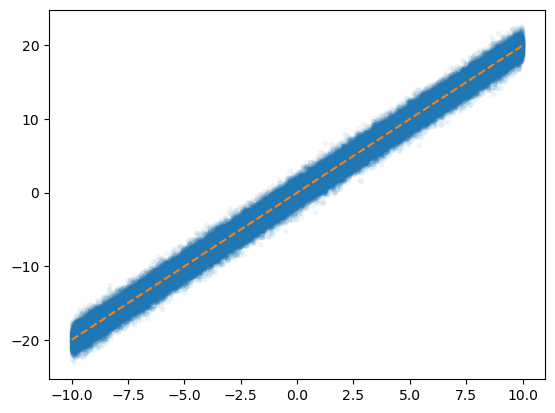

In [28]:
plt.plot(x,y,'.',alpha=0.05)
plt.plot(x,2*x,'--')

`-` 데이터의 크기가 커지는 순간 `x.to("cuda:0"), y.to("cuda:0")` 쓰면 난리나겠는걸?

> 데이터를 100개 중 1개 꼴로 쓰면 어떻까?

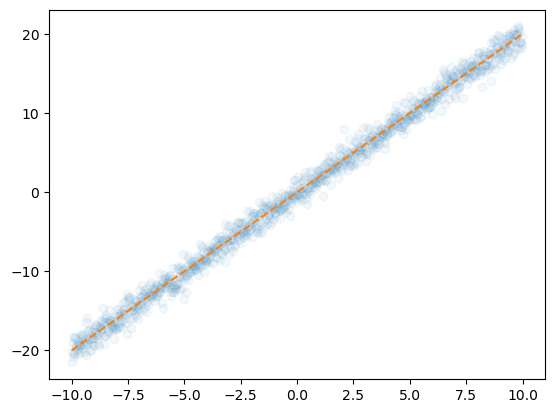

In [29]:
plt.plot(x[::100],y[::100],'o',alpha=0.05)
plt.plot(x,2*x,'--')

* 대충 이거만 가지고 적합해도 충분히 정확할 것 같은데?

### B. X, y 데이터를 굳이 모두 GPU에 넘겨야 하는가?

`-` 데이터셋을 짝홀로 나누어서 번갈아가면서 GPU에 올렸다 내렸다 하면 안되나?

`-` 아래의 알고리즘을 생각해보자

1. 데이터를 반으로 나눈다.
2. 짝수 obs의 x, y. 그리고 net의 모든 파라메터를 GPU에 올린다.
3. yhat, loss, grad, update 수행
4. 짝수 obs의 x, y를 GPU  메모리에서 내린다. 홀수 obs의 x, y를 GPU메모리에 올린다.
5. yhat, loss, grad, update 수행
6. 홀수 obs의 x, y를 GPU메모리에서 내린다. 그리고 짝수 obs의 x, y를 GPU메모리에 올린다.
7. ...반복...

> 이걸 배치 사이즈를 많이 키우면 됨...

### C. 경사하강법, 확률적경사하강법, 미니배치 경사하강법

10개의 샘플이 있다고 가정. $\{(x_i,y_i)\}_{i=1}^{10}$

`# ver1` – 모든 샘플을 이용하여 slope 계산

(epoch 1)
$loss=\sum_{i=1}^{10}(y_i-\hat{w}_0-\hat{w}_1x_i)^2 \to slope  \to update$

(epoch 2)
$loss=\sum_{i=1}^{10}(y_i-\hat{w}_0-\hat{w}_1x_i)^2 \to slope  \to update$

...

> 우리가 항상 이렇게 했죠!

`# ver2` - 하나의 샘플만을 이용하여 slope 계산

(epoch 1)

-   $loss=(y_1-\hat{w}_0-\hat{w}_1x_1)^2 \to slope \to update$
-   $loss=(y_2-\hat{w}_0-\hat{w}_1x_2)^2 \to slope \to update$
-   …
-   $loss=(y_{10}-\hat{w}_0-\hat{w}_1x_{10})^2  \to  slope  \to  update$

(epoch 2)

-   $loss=(y_1-\hat{w}_0-\hat{w}_1x_1)^2  \to slope  \to  update$
-   $loss=(y_2-\hat{w}_0-\hat{w}_1x_2)^2  \to slope  \to  update$
-   …
-   $loss=(y_{10}-\hat{w}_0-\hat{w}_1x_{10})^2  \to  slope  \to  update$

…

> 한 에폭에서 10번의 업데이트. 근데 여기서 샘플을 고르는 것을 랜덤으로 하면 SGD

`# ver3` – $m (\leq n)$ 개의 샘플을 이용하여 slope 계산

$m=3$이라고 하자.

(epoch 1)

-   $loss=\sum_{i=1}^{3}(y_i-\hat{w}_0-\hat{w}_1x_i)^2  \to  slope  \to  update$
-   $loss=\sum_{i=4}^{6}(y_i-\hat{w}_0-\hat{w}_1x_i)^2  \to  slope  \to  update$
-   $loss=\sum_{i=7}^{9}(y_i-\hat{w}_0-\hat{w}_1x_i)^2  \to  slope  \to  update$
-   $loss=(y_{10}-\hat{w}_0-\hat{w}_1x_{10})^2  \to  slope  \to  update$

(epoch 2)

-   $loss=\sum_{i=1}^{3}(y_i-\hat{w}_0-\hat{w}_1x_i)^2  \to  slope  \to  update$
-   $loss=\sum_{i=4}^{6}(y_i-\hat{w}_0-\hat{w}_1x_i)^2  \to  slope  \to  update$
-   $loss=\sum_{i=7}^{9}(y_i-\hat{w}_0-\hat{w}_1x_i)^2  \to  slope  \to  update$
-   $loss=(y_{10}-\hat{w}_0-\hat{w}_1x_{10})^2  \to  slope  \to  update$

…

> 이러한 방식이 미니배치 경사하강법. 일단 다 쓰긴 하는데, 에폭 당 손실을 여러 번 계산하여 여러 번 업데이트 함

### D. 용어의 정리

**옛날**

`-` ver1(모든): gradient descent, batch gradient descent

> 못씀

`-` ver2(하나만): stochastic gradient descent

> 굳이 이렇게 하나만 쓰기는 아까움

`-` ver3(몇개만): mini-batch gradient descent, mini-batch stochastic
gradient descent

> 얘만 쓴다고 보면 됨

**요즘**

`-` ver1(모든): gradient descent

`-` ver2(하나만): stochastic gradient descent with batch size = 1   ## 미니배치의 사이즈가 1인 경우임

`-` **ver3(몇개만): stochastic gradient descent** -
https://www.deeplearningbook.org/contents/optimization.html, 알고리즘
8-1 참고.

> 마지막에 선택되는 데이터의 가중치가 제일 큰 것을 방지하기 위해 각 배치에 포함되는 데이터를 랜덤으로 선택함

## E. Dataset(`ds`), DataLoader(`dl`)

> 취지는 알겠으나, C의 과정을 실제 구현하려면 진짜 어려움.. (입코딩과
> 손코딩의 차이) –\> 이걸 해결하기 위해서 파이토치에서는 DataLoader라는
> 오브젝트를 준비했음!

`-` 데이터

In [30]:
x=torch.tensor(range(10)).float().reshape(-1,1)
y=torch.tensor([1.0]*5+[0.0]*5).reshape(-1,1)
torch.concat([x,y],axis=1)

tensor([[0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.],
        [5., 0.],
        [6., 0.],
        [7., 0.],
        [8., 0.],
        [9., 0.]])

`-` `ds` 오브젝트

In [31]:
ds = torch.utils.data.TensorDataset(x, y)
ds

In [ ]:
ds.tensors
## 생긴건 ds.tensors = (x, y)임. 튜플로 들어간 열별 텐서

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [ ]:
ds[0], (x, y)[0]    ## 하지만 다름... (x, y) 튜플 자체는 아님. 인덱싱 방식 자체가 다름...

((tensor([0.]), tensor([1.])),
 tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]))

> 그냥 자료구조 자체가 다른 듯

In [35]:
ds[:3]

(tensor([[0.],
         [1.],
         [2.]]),
 tensor([[1.],
         [1.],
         [1.]]))

`-` `dl` 오브젝트

In [38]:
dl = torch.utils.data.DataLoader(ds, batch_size = 3)

In [39]:
for xi, yi in dl :  ## iterable obj
    print(f"x_batch : {xi.tolist()} \t y_batch : {yi.tolist()}")

x_batch : [[0.0], [1.0], [2.0]] 	 y_batch : [[1.0], [1.0], [1.0]]
x_batch : [[3.0], [4.0], [5.0]] 	 y_batch : [[1.0], [1.0], [0.0]]
x_batch : [[6.0], [7.0], [8.0]] 	 y_batch : [[0.0], [0.0], [0.0]]
x_batch : [[9.0]] 	 y_batch : [[0.0]]


> 데이터를 배치 별로 묶어주는 클래스

`-` 마지막 관측치는 뭔데 자꾸 단독으로 업데이트하냐?? -> `shuffle = True`

In [46]:
dl = torch.utils.data.DataLoader(ds, batch_size = 3, shuffle = True)

for xi, yi in dl :  ## iterable obj
    print(f"x_batch : {xi.tolist()} \t y_batch : {yi.tolist()}")

x_batch : [[7.0], [9.0], [6.0]] 	 y_batch : [[0.0], [0.0], [0.0]]
x_batch : [[1.0], [5.0], [0.0]] 	 y_batch : [[1.0], [0.0], [1.0]]
x_batch : [[8.0], [2.0], [3.0]] 	 y_batch : [[0.0], [1.0], [1.0]]
x_batch : [[4.0]] 	 y_batch : [[1.0]]


> 돌릴 때마다 달라짐.

### F. 성능체크

`-` 목표 : SGD와 그냥 경사하강법의 성능을 "동일 반복횟수"로 비교해보자. (기존 torch.optim.SGD()를 쌩으로 쓰면 그냥 경사하강법이다.)

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
to_tensor = torchvision.transforms.ToTensor()
X0 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==0])
X1 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==1])
X = torch.concat([X0,X1],axis=0).reshape(-1,784)    ## (n, 1, 28, 28) -> (n, 784)
y = torch.tensor([0.0]*len(X0) + [1.0]*len(X1)).reshape(-1,1)   ## n -> (n, 1)

In [ ]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.SGD(net.parameters())    ## 깡 경사하강법

In [49]:
for epoc in range(700):
    # step1
    yhat = net(X)
    # step2
    loss = loss_fn(yhat,y)
    # step3    
    loss.backward()
    # step4
    optimizr.step()
    optimizr.zero_grad()    

In [50]:
((yhat > 0.5) ==  y).float().mean()

tensor(0.9953)

`-` "확률적" 경사하강법 - 미니배치 쓰는 방법

In [55]:
ds = torch.utils.data.TensorDataset(X, y) ## 그냥 넣음
dl = torch.utils.data.DataLoader(ds, batch_size = 2048)

In [56]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.SGD(net.parameters())

In [57]:
## 총 100 * n/batch_size 만큼 학습함
for epoc in range(100) :
    for Xi, yi in dl :
        ## Xi : (2048, 784)
        # 1
        yi_hat = net(Xi)
        # 2
        loss = loss_fn(yi_hat, yi)
        # 3
        loss.backward()
        # 4
        optimizr.step()
        optimizr.zero_grad()

In [58]:
((net(X) > 0.5) ==  y).float().mean()

tensor(0.9931)

> 데이터를 다 안씀에도 불구하고, 그렇게 차이가 안남. 안나는 게 맞는진 잘 모르겠지만 아무튼 이 경우 에폭 늘이면 더 좋아질듯.